In [1]:
%run jupyterQ.ipynb
%run states.ipynb
p, g, a = symbols('p \gamma a', real = True, positive=True)

## __One-qubit__ decoherence channels

### Bit flip channel
Kraus operators
\begin{equation} K_{0}^{bf}=\sqrt{1-p}\sigma_{0}\text{, }K_{1}^{bf}=\sqrt{p}\sigma_{1}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{bf}(p)=\left(r_{1},r_{2}(1-2p),r_{3}(1-2p)\right).\end{equation}

In [2]:
def Kbf(j, p):
    if j == 0:
        return sqrt(1-p)*Pauli(0)
    elif j == 1:
        return sqrt(p)*Pauli(1)
def BFC(rho, p):
    return Kbf(0, p)*rho*Kbf(0, p) + Kbf(1, p)*rho*Kbf(1, p)

### Phase flip channel
Kraus operators
\begin{equation} K_{0}^{pf}=\sqrt{1-p}\sigma_{0}\text{, }K_{1}^{pf}=\sqrt{p}\sigma_{3}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{pf}(p)=\left(r_{1}(1-2p),r_{2}(1-2p),r_{3}\right).\end{equation}

In [4]:
def Kpf(j, p):
    if j == 0:
        return sqrt(1-p)*Pauli(0)
    elif j == 1:
        return sqrt(p)*Pauli(3)
def PFC(rho, p):
    return Kpf(0, p)*rho*Kpf(0, p) + Kpf(1, p)*rho*Kpf(1, p)

### Bit-phase flip channel
Kraus operators
\begin{equation} K_{0}^{bpf}=\sqrt{1-p}\sigma_{0}\text{, }K_{1}^{bpf}=\sqrt{p}\sigma_{2}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{bpf}(p)=\left(r_{1}(1-2p),r_{2},r_{3}(1-2p)\right).\end{equation}

In [5]:
def Kbpf(j, p):
    if j == 0:
        return sqrt(1-p)*Pauli(0)
    elif j == 1:
        return sqrt(p)*Pauli(2)
def BPFC(rho, p):
    return Kbpf(0, p)*rho*Kbpf(0, p) + Kbpf(1, p)*rho*Kbpf(1, p)

### Depolarizing channel
Kraus operators
\begin{equation} K_{0}^{d}=\sqrt{1-3p/4}\sigma_{0}\text{, }K_{1}^{d}=\sqrt{p/4}\sigma_{1}\text{, }K_{2}^{d}=\sqrt{p/4}\sigma_{2}\text{, }K_{3}^{d}=\sqrt{p/4}\sigma_{3}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{d}(p)=\left(r_{1}(1-p),r_{2}(1-p),r_{3}(1-p)\right).\end{equation}

In [6]:
def Kd(j, p):
    if j == 0:
        return sqrt(1-3*p/4)*Pauli(0)
    elif j == 1:
        return sqrt(p/4)*Pauli(1)
    elif j == 2:
        return sqrt(p/4)*Pauli(2)
    elif j == 3:
        return sqrt(p/4)*Pauli(3)
def DC(rho, p):
    return Kd(0, p)*rho*Kd(0, p) + Kd(1, p)*rho*Kd(1, p) + Kd(2, p)*rho*Kd(2, p) 
            + Kd(3, p)*rho*Kd(3, p)

### Amplitude damping channel
Kraus operators
\begin{equation}K_{0}^{ad} = \begin{bmatrix} 0 & \sqrt{\gamma} \\ 0 & 0 \end{bmatrix}\text{, } K_{1}^{ad} = \begin{bmatrix} 1 & 0 \\ 0 & \sqrt{1-\gamma} \end{bmatrix}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{ad}(\gamma)=\left(r_{1}\sqrt{1-\gamma},r_{2}\sqrt{1-\gamma},r_{3}(1-\gamma)+\gamma\right).\end{equation}

In [74]:
def Kad(j, a):
    if j == 0:
        return Matrix([[0,sqrt(a)],[0,0]])
    elif j == 1:
        return Matrix([[1,0],[0,sqrt(1-a)]])
def ADC(rho, g):
    return Kad(0, g)*rho*(Kad(0, g).T) + Kad(1, g)*rho*Kad(1, g)

### Generalized amplitude damping channel
Kraus operators
\begin{equation}K_{0}^{gad} = \sqrt{\gamma}\begin{bmatrix} 1 & 0 \\ 0 & \sqrt{1-a} \end{bmatrix}\text{, } K_{1}^{gad} = \sqrt{\gamma}\begin{bmatrix} 0 & \sqrt{a} \\ 0 & 0 \end{bmatrix}\text{, }K_{2}^{gad} = \sqrt{1-\gamma}\begin{bmatrix} \sqrt{1-a} & 0 \\ 0 & 1 \end{bmatrix}\text{, } K_{3}^{gad} = \sqrt{1-\gamma}\begin{bmatrix} 0 & 0 \\ \sqrt{a} & 0 \end{bmatrix}.\end{equation}
Bloch vector
\begin{equation}\vec{r}_{gad}(\gamma)=\left(r_{1}\sqrt{1-\gamma},r_{2}\sqrt{1-\gamma},r_{3}(1-\gamma)+\gamma(2a-1)\right).\end{equation}

In [8]:
def Kgad(j, g, a):
    if j == 0:
        return sqrt(g)*Matrix([[1,0],[0,sqrt(1-a)]])
    elif j == 1:
        return sqrt(g)*Matrix([[0,sqrt(a)],[0,0]])
    elif j == 2:
        return sqrt(1-g)*Matrix([[sqrt(1-a),0],[0,1]])
    elif j == 3:
        return sqrt(1-g)*Matrix([[0,0],[sqrt(a),0]])

In [9]:
def GADC(rho, g, a):
    return Kgad(0, g, a)*rho*(Kgad(0, g, a).T) + Kgad(1, g, p)*rho*Kgad(1, g, a) \
           + Kgad(2, g, a)*rho*(Kgad(2, g, a).T) + Kgad(3, g, a)*rho*Kgad(3, g, a)

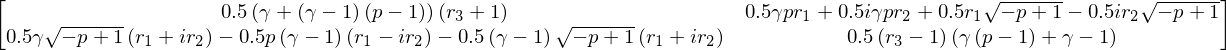

In [10]:
rho1qb_gad = GADC(rho1qb(r1, r2, r3), g, p); simplify(rho1qb_gad)

In [16]:
r1t = trace(rho1qb_gad*pauli(1)); simplify(r1t)

### Phase damping channel
Kraus operators
\begin{equation}
K_{0}^{pd} = \begin{bmatrix}0&0\\0&\sqrt{p}\end{bmatrix}\text{, } K_{1}^{pd} = \begin{bmatrix}1&0\\0&\sqrt{1-p}\end{bmatrix}.
\end{equation}
Bloch vector
\begin{equation}\vec{r}_{pd}(\gamma)=\left(r_{1}(1-\gamma),r_{2}(1-\gamma),r_{3}\right).\end{equation}

In [4]:
def Kpd(j, p):
    if j == 0:
        return Matrix([[0,0],[0,sqrt(p)]])
    elif j == 1:
        return Matrix([[1,0],[0,sqrt(1-p)]])

In [5]:
#Kpd(0, p)

# Channels compositions
## Phase damping & generalized amplitude damping

In [11]:
def Kpdgad(j,p,g,a):
    if j == 0:
        return  Kpd(0,p)*Kgad(0,g,a)
    elif j == 1:
        return  Kpd(0,p)*Kgad(1,g,a)
    elif j == 2:
        return  Kpd(0,p)*Kgad(2,g,a)
    elif j == 3:
        return  Kpd(0,p)*Kgad(3,g,a)
    elif j == 4:
        return  Kpd(1,p)*Kgad(0,g,a)
    elif j == 5:
        return  Kpd(1,p)*Kgad(1,g,a)
    elif j == 6:
        return  Kpd(1,p)*Kgad(2,g,a)
    elif j == 7:
        return  Kpd(1,p)*Kgad(3,g,a)

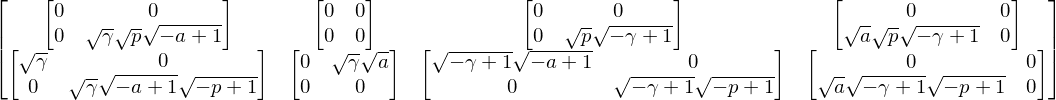

In [12]:
Matrix([[Kpdgad(0,p,g,a),Kpdgad(1,p,g,a),Kpdgad(2,p,g,a),Kpdgad(3,p,g,a)],
        [Kpdgad(4,p,g,a),Kpdgad(5,p,g,a),Kpdgad(6,p,g,a),Kpdgad(7,p,g,a)]])

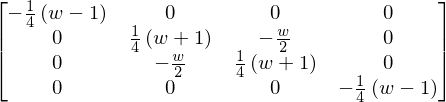

In [13]:
factor(werner(w))

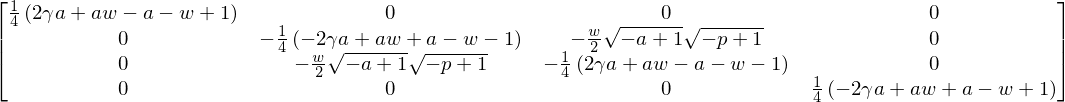

In [16]:
def werner_pdgad(w,p,g,a):
    A = tp(Kpdgad(0,p,g,a),pauli(0))*werner(w)*tp(Kpdgad(0,p,g,a),pauli(0)) \
    + tp(Kpdgad(2,p,g,a),pauli(0))*werner(w)*tp(Kpdgad(2,p,g,a),pauli(0))
    A += tp(Kpdgad(3,p,g,a),pauli(0))*werner(w)*tp(Kpdgad(3,p,g,a).T,pauli(0)) \
    + tp(Kpdgad(4,p,g,a),pauli(0))*werner(w)*tp(Kpdgad(4,p,g,a),pauli(0))
    A += tp(Kpdgad(5,p,g,a),pauli(0))*werner(w)*tp(Kpdgad(5,p,g,a).T,pauli(0)) \
    + tp(Kpdgad(6,p,g,a),pauli(0))*werner(w)*tp(Kpdgad(6,p,g,a),pauli(0))
    A += tp(Kpdgad(7,p,g,a),pauli(0))*werner(w)*tp(Kpdgad(7,p,g,a).T,pauli(0))
    return A
factor(werner_pdgad(w,p,g,a))

### Composition of phase damping and amplitude damping

In [75]:
def Kpdad(j,p,a):
    if j == 0:
        return  Kpd(0,p)*Kad(0,a)
    elif j == 1:
        return  Kpd(0,p)*Kad(1,a)
    elif j == 2:
        return  Kpd(1,p)*Kad(0,a)
    elif j == 3:
        return  Kpd(1,p)*Kad(1,a)

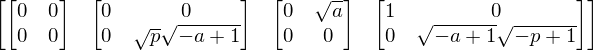

In [77]:
p, a = symbols('p a')
Matrix([[Kpdad(0,p,a),Kpdad(1,p,a),Kpdad(2,p,a),Kpdad(3,p,a)]])

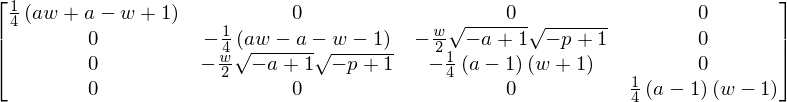

In [79]:
def werner_pdad(w,p,A):
    A = tp(Kpdad(1,p,a),Pauli(0))*werner(w)*tp(Kpdad(1,p,a),Pauli(0)) + tp(Kpdad(2,p,a),Pauli(0))*werner(w)*tp(Kpdad(2,p,a).T,Pauli(0))
    A += tp(Kpdad(3,p,a),Pauli(0))*werner(w)*tp(Kpdad(3,p,a),Pauli(0))
    return A
factor(werner_pdad(w,p,a))

## __Two-qubit__ decoherence channels

In [ ]:
def PDC(rho, g):
    return Kpd(0, g)*rho*Kpd(0, g) + Kpd(1, g)*rho*Kpd(1, g) + Kpd(2, g)*rho*Kpd(2, g)